In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/items-stats.csv')
df.head()

,item_points,item,team,role,opponent,score
0,16,Arcane Adrenaline,BDS Academy,top,LDLC OL,9
1,0,Arcane Explosive,BDS Academy,top,LDLC OL,9
2,0,Beast Hunter,BDS Academy,top,LDLC OL,9
3,0,Being of Light,BDS Academy,top,LDLC OL,9
4,14,Berseker Ax,BDS Academy,top,LDLC OL,9


In [3]:
df.team.unique()

array(['BDS Academy', 'LDLC OL', 'BK ROG', 'Solary', 'Vitality.Bee',
       'Aegis', 'Team GO', 'Karmine Corp', 'GameWard', 'IziDream'],
      dtype=object)

In [4]:
df_items = pd.read_csv('data/items-costs.csv')
df_items.head()

,item,cost
0,Wild Claw,3
1,Sharp Blade,3
2,Scale Tearer,3
3,Spirit of the Squire,3
4,Big Worm Hunter,3


In [5]:
# df completed with item cost with a join
df = df.merge(df_items, on='item', how='inner')
df.head()

,item_points,item,team,role,opponent,score,cost
0,16,Arcane Adrenaline,BDS Academy,top,LDLC OL,9,1
1,0,Arcane Adrenaline,BDS Academy,jungle,LDLC OL,24,1
2,0,Arcane Adrenaline,BDS Academy,mid,LDLC OL,3,1
3,0,Arcane Adrenaline,BDS Academy,bot,LDLC OL,13,1
4,0,Arcane Adrenaline,BDS Academy,support,LDLC OL,10,1


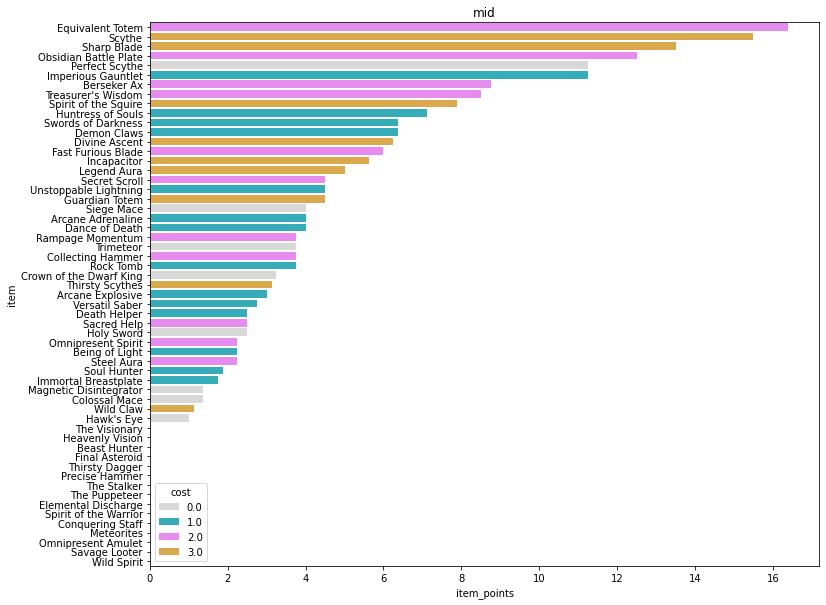

In [11]:
# Best items on average for mids

role = "mid"

palette = ["#D8D8D8", "#20BECE", "#F37BFF", "#F2B036"]

mean_df = df[(df.role == role)].groupby('item', as_index=False).mean("item_points").sort_values("item_points", ascending=False)
plt.figure(figsize=(12,10))
ax = sns.barplot(x="item_points", y="item", data=mean_df, hue="cost", palette=palette, dodge=False).set_title(role)

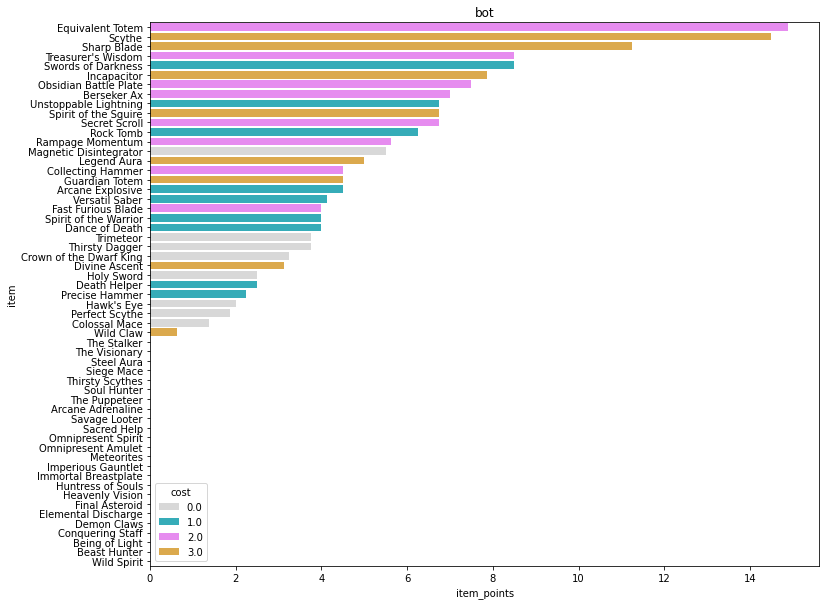

In [12]:
# Best item on Aegis botlaner

role = "bot"

palette = ["#D8D8D8", "#20BECE", "#F37BFF", "#F2B036"]

mean_df = df[(df.role == role) & (df.team == "Aegis")].groupby('item', as_index=False).mean("item_points").sort_values("item_points", ascending=False)
plt.figure(figsize=(12,10))
ax = sns.barplot(x="item_points", y="item", data=mean_df, hue="cost", palette=palette, dodge=False).set_title(role)